# Demonstrating Oct-Resnet50 on ImageNette

Imagenette has 10 easy classes from ImageNet. https://github.com/fastai/imagenette

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from fastai.vision import *
from octconv import *

## Get Data

In [2]:
path = untar_data(URLs.IMAGENETTE)

In [3]:
bs, size = 32, 256

data = (ImageList.from_folder(path).split_by_folder(valid='val')
            .label_from_folder().transform(([flip_lr(p=0.5)], []), size=size)
            .databunch(bs=bs)
            .presize(size, scale=(0.35,1))
            .normalize(imagenet_stats))

## Test model with alpha = 0.25

Alpha gives the fraction of activations in the low-frequency channel.

In [4]:
model = oct_resnet50(0.25, num_classes=10).cuda()

In [5]:
xb, yb = next(iter(data.train_dl))
preds = model(xb)
preds.shape

torch.Size([32, 10])

## Fit Model for 5 epochs

Note that parameters are probably not initialized in the best way. I would run an LSUV init to make initial training better.

In [6]:
learn = Learner(data, model, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


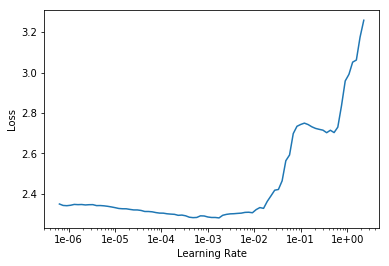

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.795599,2.419441,0.314000,07:06
1,1.491619,1.532675,0.524000,07:06
2,1.185436,0.950040,0.692000,07:06
3,0.937341,0.711977,0.774000,07:06
4,0.800490,0.586513,0.820000,07:06


In [9]:
learn.save('oct_resnet50')